# Probability
> Probabilities are the areas under a fixed distribution.

## Likelihood
> Likelihoods are the y-axis values for fixed data points with distributions that can be moved.


-------

## Trying to understand probability:

> Q. The probability of the event `both children are girls` and ` at least one of the children is a girl`?

$P(B/L) = \frac{P(B, L)}{P(L)} = \frac{P(B)}{P(L)} = \frac{1}{3}$

> checking the same, with an example by generating case for multiple families.

In [16]:
import enum, random
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [1]:
class Kid(enum.Enum):
  BOY=0
  GIRL=1

def random_kid() -> Kid:
  return random.choice([Kid.BOY, Kid.GIRL])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10000):
  younger = random_kid()
  older = random_kid()

  if older == Kid.GIRL:
    older_girl += 1
  if older == Kid.GIRL and younger == Kid.GIRL:
    both_girls += 1
  if older == Kid.GIRL or younger == Kid.GIRL:
    either_girl += 1
  

In [2]:
print(f"P(both | older): {both_girls / older_girl}")
print(f"P(both | either): {both_girls / either_girl}")

P(both | older): 0.5007089325501317
P(both | either): 0.3311897106109325


## Bayes' Theorem

$P(D|T) = P(T|D) P(D) / [P(T|D)P(D) + P(T|-D)P(-D)]$

<ins>Expected value</ins>
> average of all values of a _random variable_ weighted by their probabilities.



-------

## Continuous Distribution
There are infinite numbers between 0 and 1. Therefore, weight assigned to individual points must be zero. Thus, we represent a continuous distribution with a _probability density function (PDF)_.

> The probability of seeing a value in a certain interval equals the integral of the density function over the interval.

In [4]:
# density function for the uniform distribution

def uniform_pdf(x: float)-> float:
  return 1 if 0<=x<1 else 0

In [6]:
def uniform_cdf(x: float)-> float:
  """Returns the probability that a uniform random variable is <= x"""
  if x<0: return 0   # uniform random is never less than 0
  elif x<1: return x # e.g. P(x <= 0.4) = 0.4
  else: return 1     # uniform random is always less than 1

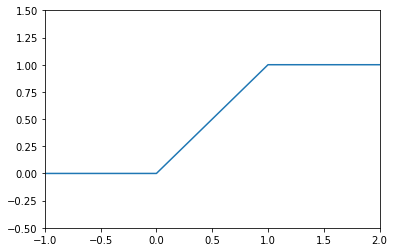

In [26]:
cdf_vals = []
random_vars = np.arange(-1.0, 2.5, 0.5)
for num in random_vars:
  cdf_vals.append(uniform_cdf(num))

plt.plot(random_vars, cdf_vals)
plt.xlim(-1.0, 2.0)
plt.ylim(-0.5, 1.5)
plt.show()

## The Normal Distribution

$f(x|\mu, \sigma) = \frac{1}{\sqrt{(2\pi\sigma)}} exp(-\frac{(x-\mu)^2}{2\sigma^2})$

$\mu$ - mean    
$\sigma$ - standard deviation

In [27]:
import math
sqrt_two_pi = math.sqrt(2 * math.pi)

def normal_pdf(x: float, mu: float=0, sigma: float=1) -> float:
  return (math.exp(-(x-mu)**2/2/sigma**2))/(sqrt_two_pi*sigma)

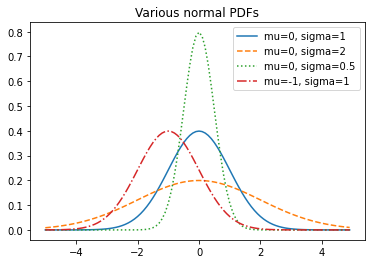

In [31]:
xs = [x/10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend()
plt.title("Various normal PDFs")
plt.show()

In [32]:
def normal_cdf(x: float, mu: float=0, sigma: float=1) -> float:
  return(1+math.erf((x-mu) / math.sqrt(2)/sigma))/2

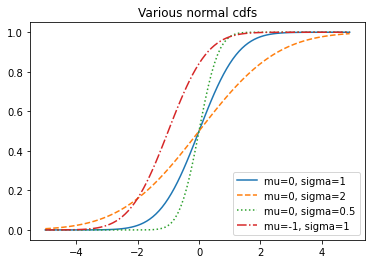

In [34]:
xs = [x/10.0 for x in  range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend(loc=4) # bottom right corner
plt.title("Various normal cdfs")
plt.show()

 To find the value corresponding to a specific probability, inverting `normal_cdf`.

In [35]:
def inverse_normal_cdf(p: float, 
                       mu: float = 0, 
                       sigma: float=1, 
                       tolerance: float = 0.00001) -> float:
                       """Find approximate inverse using binary search"""

                       # if not standard, computing standard and rescale

                       if mu!=0 or sigma!=1:
                         return mu + sigma + inverse_normal_cdf(p, tolerance=tolerance)
                       low_z = -10.0  # normal_cdf(-10) is (very close to) 0
                       hi_z = 10.0    # normal_cdf(10) is (very close to) 1
                       while hi_z - low_z > tolerance:
                         mid_z = (low_z + hi_z)/2
                         mid_p = normal_cdf(mid_z)
                         if mid_p < p:
                           low_z=mid_z
                         else:
                           hi_z=mid_z
                       return mid_z

In [39]:
inverse_normal_cdf(0), inverse_normal_cdf(1), inverse_normal_cdf(0.5)

(-9.999990463256836, 8.244009017944336, -9.5367431640625e-06)

## The Central Limit Theorem
> a random variable defined as the average of a large number of independent and identically distributed random variables is itself approx normally distributed.

$x_{1}, ... x_{n}$ - random variables    
$\mu$ - mean     
$\sigma$ - standard deviation  
$\frac{1}{n}(x_{1}+ ... +x_{n})$ is approx normally distributed with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt(n)}$

-------
-------



$\frac{(x_{1}+...+x_{n})-\mu n}{\sigma \sqrt(n)}$
> normally distributed with mean 0 and standard deviation 1.




In [40]:
# Binomial distribution
def bernoulli_trial(p:float)-> int:
  """Returns 1 with probability p and 0 with probability 1-p"""
  return 1 if random.random()<p else 0

def binomial(n: int, p: float) -> int:
  """Returns the sum of n bernoulli(p) trials"""
  return sum(bernoulli_trial(p) for _ in range(n))

In [41]:
from collections import Counter

def binomial_histogram(p: float, n: int, num_points: int) -> None:
  """Picks points from a Binomial(n, p) and plots their histogram"""
  data = [binomial(n,p) for _ in range(num_points)]

  # bar chart to show the actual binomial samples
  histogram = Counter(data)
  plt.bar([x - 0.4 for x in histogram.keys()],
          [v / num_points for v in histogram.values()],
          0.8,
          color='0.75')
  
  mu = p*n
  sigma = math.sqrt(n*p*(1-p))

  # use a line chart to show the normal approximation
  xs = range(min(data), max(data)+1)
  ys = [normal_cdf(i+0.5, mu, sigma)-normal_cdf(i-0.5, mu, sigma) for i in xs]
  plt.plot(xs, ys)
  plt.title("Binomial Distribution vs. Normal Approximation")
  plt.show()

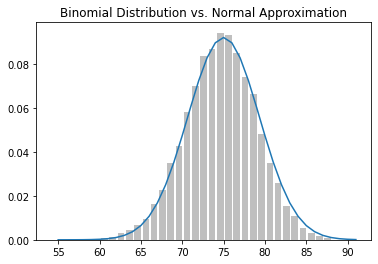

In [42]:
binomial_histogram(0.75, 100, 10000)

 # Script Complete